In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt_scale = 3

In [3]:
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read('klavir.wav')
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone


In [4]:
my_tones = (37, 77, 93) # ze zadani
a, b, c = (xall[my_tone] for my_tone in my_tones)
len(a)

24000

# 4.1 Základy – 2 body
Načtěte všechny signály a vyberte 0.5 s dlouhý úsek ze stabilní části signálu, tedy té, kde zní pouze tón a už není
slyšet úder kladívka (doporučujeme přeskočit první 0.25 s signálu)

Zobrazte 3 periody vašich tří tónů v ustálené části a spočítejte a vykreslete DFT celého 0.5 s dlouhého úseku.
Vaše tóny uložte jako audio/a_orig.wav, audio/b_orig.wav, a audio/c_orig.wav

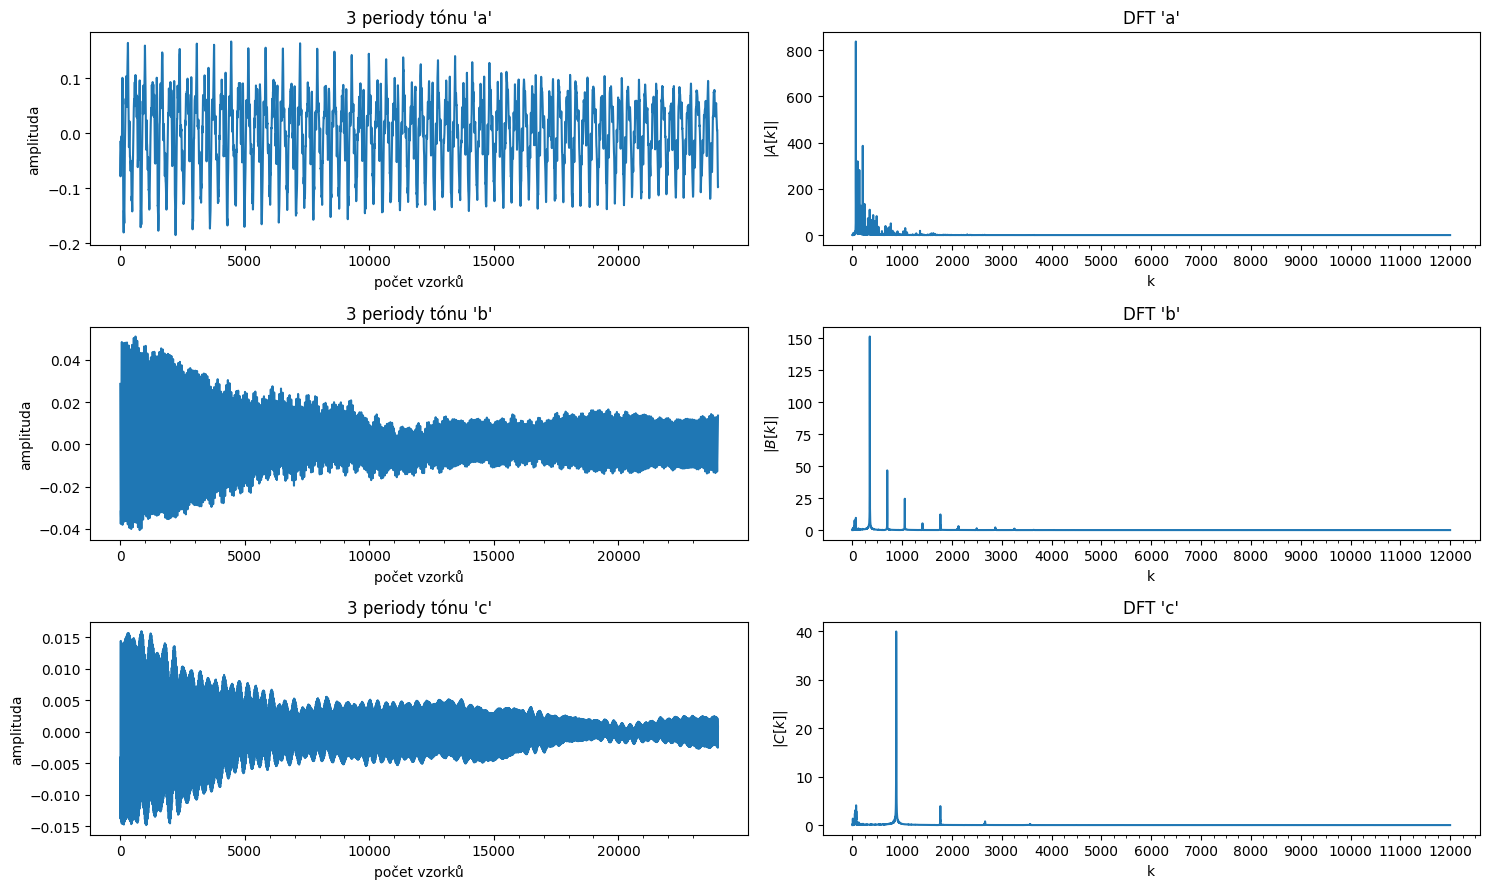

In [38]:
fig, (a_plots, b_plots, c_plots) = plt.subplots(3, 2, figsize=(5*plt_scale, 3*plt_scale))
def plot_tone(tone, id, axis):
    fft_of_tone = np.fft.fft(tone)
    # TODO: vykreslit 3 periody ??? co to znamená, prolly budu potřebovat celou nahrávku, vypočítat periodu signálu a vykreslit s[samplefrom:samplefrom+3*periodaT]
    axis[0].set_ylabel(f"amplituda")
    axis[0].set_xlabel(f"počet vzorků")
    axis[0].set_xticks(np.arange(0, len(a), 5000))
    axis[0].set_xticks(np.arange(0, len(a), 1000), minor=True)
    axis[0].plot(tone)
    axis[0].set_title(f"3 periody tónu \'{id}\'")

    axis[1].set_xticks(np.arange(0, len(fft_of_tone), 1000))
    axis[1].set_xticks(np.arange(0, len(fft_of_tone), 250), minor=True)
    axis[1].set_ylabel(f"$|{id.upper()}[k]|$")
    axis[1].set_xlabel('k')
    axis[1].plot(np.abs(fft_of_tone[:len(fft_of_tone)//2]))
    axis[1].set_title(f"DFT \'{id}\'")
    return fft_of_tone

plot_tone(a, 'a', a_plots)
plot_tone(b, 'b', b_plots)
plot_tone(c, 'c', c_plots)

fig.tight_layout()

In [14]:
# Vaše tóny uložte jako audio/a_orig.wav, audio/b_orig.wav, a audio/c_orig.wav
for orig_tone, orig_name in zip([a, b, c], ["a", "b", "c"]):
    sf.write(f"{orig_name}_orig.wav", orig_tone, Fs)

# 4.2 Určení základní frekvence – 3 body

Spočítejte základní frekvenci všech tónů a srovnejte je s frekvencemi definovanými MIDI. Základní frekvenci můžete
spočítat pomocí autokorelace nebo DFT.
Pro vaše tři tóny zobrazte graf s použitou metodou a vyznačte v něm, kde/jak jste nalezli f0, pokud jste použili
nějaký výpočet, uveďte jej. Pokud vidíte rozdíly mezi očekávanou (MIDI) a skutečnou frekvencí, komentujte z
čeho mohou plynout. Rozladění piana, přesnost metody (jaká je?), ...
Hint: Autokorelace funguje lépe pro tóny s nižší frekvencí, kde má DFT občas tendenci selhávat a naopak.
Máte k dispozici MIDI frekvenci, pomocí které si můžete zkontrolovat, jestli jste frekvenci určili správně.

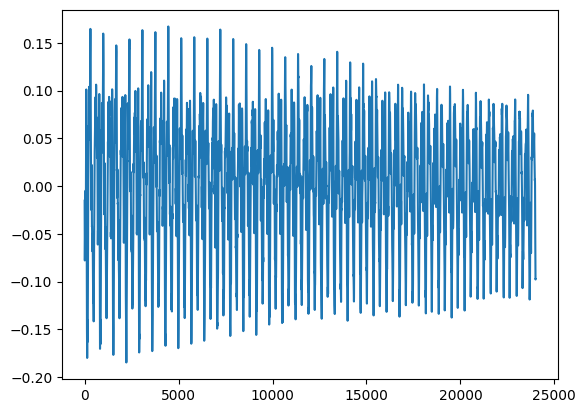

In [7]:
#TODO: spočítej DFT podle ISS ipynb notebooků, prolly to bude zase hledání nejvyššího kopce v grafu po DFT
# plot puvodnich vsech tonu klaviru
plt.plot(xall[37])

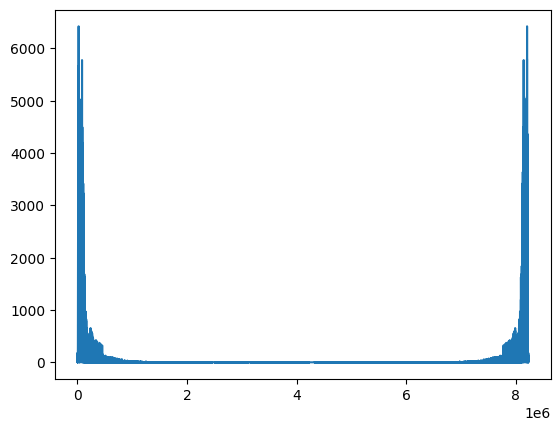

In [8]:

s_DFT = np.fft.fft(s)
s_Module = np.abs(s_DFT)
plt.plot(s_Module)

# Načtení midi 

In [9]:
# Načtení midi.text
midi = np.loadtxt("midi.txt", delimiter='\t')[::-1]
pd.DataFrame(midi)

,0,1
0,24.0,32.70
1,25.0,34.65
2,26.0,36.71
3,27.0,38.89
4,28.0,41.20
...,...,...
80,104.0,3322.44
81,105.0,3520.00
82,106.0,3729.31
83,107.0,3951.07


# Načtení skladby

In [10]:
# Načtení skladby
skladba = np.loadtxt("skladba.txt", delimiter=' ', dtype=np.dtype('f, f, i, i'))
pd.DataFrame(skladba)

,f0,f1,f2,f3
0,7200.0,8100.0,64,44
1,12600.0,13500.0,64,44
2,23400.0,24300.0,64,44
3,28800.0,29700.0,64,44
4,50400.0,51300.0,64,49
...,...,...,...,...
1169,19350.0,19800.0,67,70
1170,46350.0,46800.0,67,70
1171,73350.0,73800.0,67,70
1172,100350.0,100800.0,67,70
